In [2]:
CONSTRAINT_TOOLS = '/scratch/ucgd/lustre-work/quinlan/u6018199/constraint-tools'
CONSTRAINT_TOOLS_DATA = '/scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools'

import sys
sys.path.append(f'{CONSTRAINT_TOOLS}/utilities')

LOWER_DELETION_SIZE_LIMIT = 4000
UPPER_DELETION_SIZE_LIMIT = 10000
DELETION_ALLELE_FREQ_THRESHOLD = 0.00001

# Filter out false deletions: 
SUSPICIOUS_DELETION_SIZE_THRESHOLD = 1000000

DELETION_CLASS = 'observed' # TOPMED 

# previously used: 'constraint-labeled'
# 'genehancer' requires more effort 
ENHANCERS_CLASS = 'khurana' 

## Get windows straddling enhancers, and intersect those windows with deletions

In [3]:
from shell import shell
import pandas as pd

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 200)

def intersect_enhancer_straddling_windows_with_deletions(deletion_type, window_size): 
  windows_with_deletions = f'{CONSTRAINT_TOOLS_DATA}/enhancer-straddling-windows/{ENHANCERS_CLASS}/enhancer-straddling-windows-intersect-{deletion_type}-{DELETION_CLASS}-deletions.bed'

  intersect_script = f'{CONSTRAINT_TOOLS}/experiments/germline-model/chen-et-al-2022/intersect-enhancer-straddling-windows-with-deletions.sh'

  cmd = (
    f'bash '
    f'{intersect_script} '
    f'{DELETION_CLASS} {windows_with_deletions} '
    f'{deletion_type} '
    f'{LOWER_DELETION_SIZE_LIMIT} {UPPER_DELETION_SIZE_LIMIT} {DELETION_ALLELE_FREQ_THRESHOLD} '
    f'{SUSPICIOUS_DELETION_SIZE_THRESHOLD} '
    f'{window_size} '
    f'{ENHANCERS_CLASS}'
  )
  print(shell(cmd))

  df = pd.read_csv(
    windows_with_deletions, 
    sep='\t',
  )

  return df 

intersect_enhancer_straddling_windows_with_deletions(
  deletion_type='short', 
  window_size=10,
) 

Wrote windows with deletion overlaps to: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/enhancer-straddling-windows-intersect-short-observed-deletions.bed



,window_chrom,window_start,window_end,chromosome_hg38,start_hg38,end_hg38,outDegree,indegreeAveGene,indegreeVarGene,indispenAveGene,indispenVarGene,numTissueAve,numTissueVar,closeAveGene,closeVarGene,degreeAveGene,degreeVarGene,pgrkAveGene,pgrkVarGene,egAveGene,egVarGene,SG1_outDegree,SG1_indegreeAveGene,SG1_indegreeVarGene,SG8_outDegree,SG8_indegreeAveGene,SG8_indegreeVarGene,SG19_outDegree,SG19_indegreeAveGene,SG19_indegreeVarGene,SG29_outDegree,SG29_indegreeAveGene,SG29_indegreeVarGene,SG32_outDegree,SG32_indegreeAveGene,SG32_indegreeVarGene,SG36_outDegree,SG36_indegreeAveGene,SG36_indegreeVarGene,SG37_outDegree,SG37_indegreeAveGene,SG37_indegreeVarGene,SG38_outDegree,SG38_indegreeAveGene,SG38_indegreeVarGene,SG47_outDegree,SG47_indegreeAveGene,SG47_indegreeVarGene,SG50_outDegree,SG50_indegreeAveGene,SG50_indegreeVarGene,SG53_outDegree,SG53_indegreeAveGene,SG53_indegreeVarGene,SG57_outDegree,SG57_indegreeAveGene,SG57_indegreeVarGene,SG65_outDegree,SG65_indegreeAveGene,SG65_indegreeVarGene,SG68_outDegree,SG68_indegreeAveGene,SG68_indegreeVarGene,SG72_outDegree,SG72_indegreeAveGene,SG72_indegreeVarGene,conservation,numTissue,delState,#CHROM,START,END,SVLEN,SVTYPE,SOURCE,SV_ID,AF,HomRef,Het,HomAlt,Male_AF,Male_HomRef,Male_Het,Male_HomAlt,Male_HemiAlt,Male_HemiAF,Female_AF,Female_HomRef,Female_Het,Female_HomAlt,AFR_AF,AFR_HomRef,AFR_Het,AFR_HomAlt,AFR_Male_AF,AFR_Male_HomRef,AFR_Male_Het,AFR_Male_HomAlt,AFR_Male_HemiAlt,AFR_Male_HemiAF,AFR_Female_AF,AFR_Female_HomRef,AFR_Female_Het,AFR_Female_HomAlt,AMR_AF,AMR_HomRef,AMR_Het,AMR_HomAlt,AMR_Male_AF,AMR_Male_HomRef,AMR_Male_Het,AMR_Male_HomAlt,AMR_Male_HemiAlt,AMR_Male_HemiAF,AMR_Female_AF,AMR_Female_HomRef,AMR_Female_Het,AMR_Female_HomAlt,EAS_AF,EAS_HomRef,EAS_Het,EAS_HomAlt,EAS_Male_AF,EAS_Male_HomRef,EAS_Male_Het,EAS_Male_HomAlt,EAS_Male_HemiAlt,EAS_Male_HemiAF,EAS_Female_AF,EAS_Female_HomRef,EAS_Female_Het,EAS_Female_HomAlt,EUR_AF,EUR_HomRef,EUR_Het,EUR_HomAlt,EUR_Male_AF,EUR_Male_HomRef,EUR_Male_Het,EUR_Male_HomAlt,EUR_Male_HemiAlt,EUR_Male_HemiAF,EUR_Female_AF,EUR_Female_HomRef,EUR_Female_Het,EUR_Female_HomAlt,OTH_AF,OTH_HomRef,OTH_Het,OTH_HomAlt,OTH_Male_AF,OTH_Male_HomRef,OTH_Male_Het,OTH_Male_HomAlt,OTH_Male_HemiAlt,OTH_Male_HemiAF,OTH_Female_AF,OTH_Female_HomRef,OTH_Female_Het,OTH_Female_HomAlt,SAS_AF,SAS_HomRef,SAS_Het,SAS_HomAlt,SAS_Male_AF,SAS_Male_HomRef,SAS_Male_Het,SAS_Male_HomAlt,SAS_Male_HemiAlt,SAS_Male_HemiAF,SAS_Female_AF,SAS_Female_HomRef,SAS_Female_Het,SAS_Female_HomAlt,PopMax_AF,InPop
0,chr1,2332455,2332466,chr1,2332361,2332561,6,28.000000,42.666667,0.540501,0.151947,2.000000,0.333333,0.040223,2.030436e-03,0.000133,3.471361e-09,0.000023,1.072952e-09,1.501623e-05,1.127179e-09,6.0,17.166667,15.138889,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,6.6,8.64,0.0,0.0,0.00,0.0,0.0,0.0,1.0,14.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.001400,3,NotDeleted,chr1,2331300,2335000,3700,DEL,TOPMed,DEL_1:2331301-2335000,0.000011,140859,3,0,0.000008,64005,1,0,0,0.000000,0.000014,73862,2,0,0.000000,41663,0,0,0.000000,17390,0,0,0,0.000000,0.000000,24273,0,0,0.000000,4688,0,0,0.000000,2210,0,0,0,0,0.000000,2478,0,0,0.000000,6852,0,0,0.000000,3273,0,0,0,0.000000,0.000000,3579,0,0,0.000019,79723,3,0,0.000013,37691,1,0,0,0.000000,0.000024,42032,2,0,0.000000,342,0,0,0.0000,220,0,0,0,0.000000,0.000000,122,0,0,0.000000,4598,0,0,0.000000,3221,0,0,0,0.000000,0.000000,1377,0,0,0.000019,1
1,chr1,2596255,2596266,chr1,2596161,2596361,2,34.500000,56.250000,0.137321,0.000000,1.000000,0.000000,0.000130,7.998072e-10,0.000130,7.998072e-10,0.000014,2.705123e-11,2.506624e-37,2.965265e-75,0.0,0.000000,0.000000,2.0,14.5,56.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.003820,0,NotDeleted,chr1,2593121,2596300,3179,DEL,TOPMed,DEL_1:2593122-2596300,0.000011,141124,3,0,0.000008,64131,1,0,0,0.000000,0.000014,73998,2,0,0.0000

## Filter enhancers by network properties

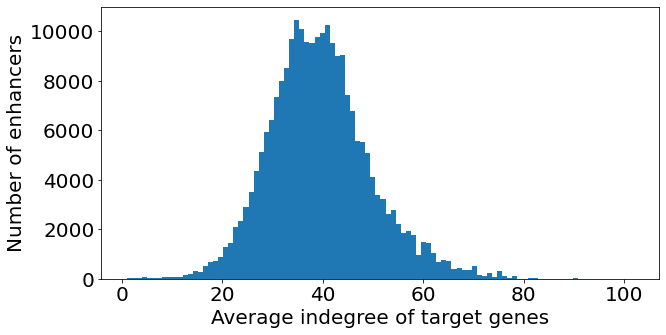

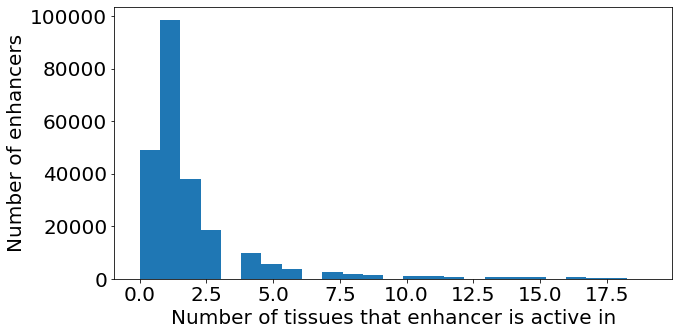

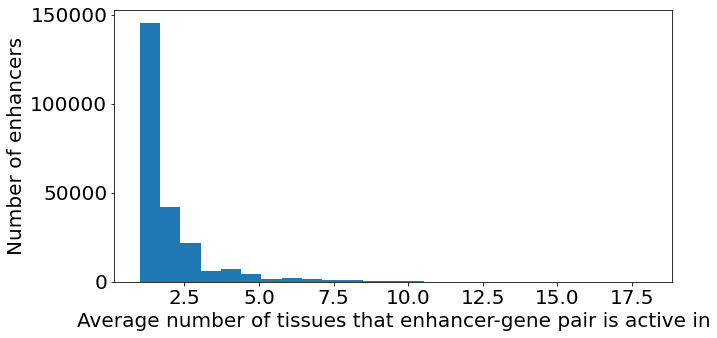

,chromosome_hg38,start_hg38,end_hg38,outDegree,indegreeAveGene,indegreeVarGene,indispenAveGene,indispenVarGene,numTissueAve,numTissueVar,closeAveGene,closeVarGene,degreeAveGene,degreeVarGene,pgrkAveGene,pgrkVarGene,egAveGene,egVarGene,SG1_outDegree,SG1_indegreeAveGene,SG1_indegreeVarGene,SG8_outDegree,SG8_indegreeAveGene,SG8_indegreeVarGene,SG19_outDegree,SG19_indegreeAveGene,SG19_indegreeVarGene,SG29_outDegree,SG29_indegreeAveGene,SG29_indegreeVarGene,SG32_outDegree,SG32_indegreeAveGene,SG32_indegreeVarGene,SG36_outDegree,SG36_indegreeAveGene,SG36_indegreeVarGene,SG37_outDegree,SG37_indegreeAveGene,SG37_indegreeVarGene,SG38_outDegree,SG38_indegreeAveGene,SG38_indegreeVarGene,SG47_outDegree,SG47_indegreeAveGene,SG47_indegreeVarGene,SG50_outDegree,SG50_indegreeAveGene,SG50_indegreeVarGene,SG53_outDegree,SG53_indegreeAveGene,SG53_indegreeVarGene,SG57_outDegree,SG57_indegreeAveGene,SG57_indegreeVarGene,SG65_outDegree,SG65_indegreeAveGene,SG65_indegreeVarGene,SG68_outDegree,SG68_indegreeAveGene,SG68_indegreeVarGene,SG72_outDegree,SG72_indegreeAveGene,SG72_indegreeVarGene,conservation,numTissue,delState
0,chr1,14800,15200,1,4.000000,0.000000,0.499665,0.103495,1.0,0.000000,0.000015,0.000000e+00,0.000015,0.000000e+00,0.000006,0.000000e+00,2.921513e-38,0.000000e+00,0.0,0.000000,0.000000,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0000,0.0,0.0,0.0,1.0,3.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0000,0.0,0.0,0.0,0.248405,1,NotDeleted
1,chr1,16000,16400,1,4.000000,0.000000,0.164652,0.000000,1.0,0.000000,0.000015,0.000000e+00,0.000015,0.000000e+00,0.000006,0.000000e+00,2.921513e-38,0.000000e+00,0.0,0.000000,0.000000,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0000,0.0,0.0,0.0,1.0,3.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0000,0.0,0.0,0.0,0.002235,1,NotDeleted
2,chr1,20200,20400,1,4.000000,0.000000,0.650182,0.019668,3.0,0.000000,0.000015,0.000000e+00,0.000015,0.000000e+00,0.000006,0.000000e+00,2.921513e-38,0.000000e+00,0.0,0.000000,0.000000,1.0,1.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0000,0.0,0.0,0.0,1.0,3.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,1.0,1.00,0.0000,0.0,0.0,0.0,0.108910,3,NotDeleted
3,chr1,79200,79800,1,4.000000,0.000000,0.194831,0.000000,1.0,0.000000,0.000015,0.000000e+00,0.000015,0.000000e+00,0.000006,0.000000e+00,2.921513e-38,0.000000e+00,1.0,1.000000,0.000000,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0000,0.0,0.0,0.0,0.125478,1,NotDeleted
4,chr1,598620,599020,2,7.000000,36.000000,0.084117,0.000000,1.0,0.000000,0.000026,5.118766e-10,0.000026,5.118766e-10,0.000005,8.848082e-12,5.099683e-38,1.897769e-75,0.0,0.000000,0.000000,2.0,3.500,6.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0000,0.0,0.0,0.0,0.839952,0,NotDeleted
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235175,chr22,50780972,50781372,3,27.666667,8.222222,0.669443,0.000000,1.0,0.000000,0.006646,8.559088e-05,0.000112,2.496188e-10,0.000018,2.222650e-10,4.491593e-17,4.034881e-33,0.0,0.000000,0.000000,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,3.0,13.0,6.00,0.0,0.0,0.0,0.0,0.00,0.0000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0000,0.0,0.0,0.0,0.024565,1,NotDeleted
235176,chr22,50782372,50783172,10,33.200000,18.560000,0.492987,0.048604,3.8,11.360000,0.017722,9.127898e-04,0.000143,1.205754e-09,0.000018,5.103543e-10,7.855987e-08,4.672169e-14,4.0,16.750000,7

In [10]:
import json 
import matplotlib.pyplot as plt

plt.rc('figure', figsize=(10, 5))
plt.rc('font', size=20)

def plot_enhancer_network_feature_distribution(): 
  with open(f'{CONSTRAINT_TOOLS_DATA}/khurana/all-enhancers-with-network-features.hg38.sorted.json', 'r') as f:
    columns = json.load(f)

  df = pd.read_csv(
    f'{CONSTRAINT_TOOLS_DATA}/khurana/all-enhancers-with-network-features.hg38.sorted.bed', 
    sep='\t',
    names=columns,
  )  

  regular_chromosomes = set(f'chr{str(id)}' for id in list(range(1,23)) + ['X', 'Y'])
  df = df[df['chromosome_hg38'].isin(regular_chromosomes)]

  df = df[
    (df['chromosome_hg38'] != 'chrX') &
    (df['chromosome_hg38'] != 'chrY')
  ]

  df['indegreeAveGene'].plot.hist(bins=100)
  plt.xlabel('Average indegree of target genes')
  plt.ylabel('Number of enhancers')
  plt.show()
  
  df['numTissue'].plot.hist(bins=25)
  plt.xlabel('Number of tissues that enhancer is active in')
  plt.ylabel('Number of enhancers')
  plt.show()

  
  df['numTissueAve'].plot.hist(bins=25)
  plt.xlabel('Average number of tissues that enhancer-gene pair is active in')
  plt.ylabel('Number of enhancers')
  plt.show()

  return df 

plot_enhancer_network_feature_distribution()

In [11]:
def filter_1(df, gene_indegree_threshold=25): 
  # enhancers that are less redundant have lower GIDa (average gene indegree)
  df = df[df['indegreeAveGene'] < gene_indegree_threshold]
  return df  

filter_1(
  intersect_enhancer_straddling_windows_with_deletions(
    deletion_type='short', 
    window_size=10,
  ), 
)

Wrote windows with deletion overlaps to: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/enhancer-straddling-windows-intersect-short-observed-deletions.bed



,window_chrom,window_start,window_end,chromosome_hg38,start_hg38,end_hg38,outDegree,indegreeAveGene,indegreeVarGene,indispenAveGene,indispenVarGene,numTissueAve,numTissueVar,closeAveGene,closeVarGene,degreeAveGene,degreeVarGene,pgrkAveGene,pgrkVarGene,egAveGene,egVarGene,SG1_outDegree,SG1_indegreeAveGene,SG1_indegreeVarGene,SG8_outDegree,SG8_indegreeAveGene,SG8_indegreeVarGene,SG19_outDegree,SG19_indegreeAveGene,SG19_indegreeVarGene,SG29_outDegree,SG29_indegreeAveGene,SG29_indegreeVarGene,SG32_outDegree,SG32_indegreeAveGene,SG32_indegreeVarGene,SG36_outDegree,SG36_indegreeAveGene,SG36_indegreeVarGene,SG37_outDegree,SG37_indegreeAveGene,SG37_indegreeVarGene,SG38_outDegree,SG38_indegreeAveGene,SG38_indegreeVarGene,SG47_outDegree,SG47_indegreeAveGene,SG47_indegreeVarGene,SG50_outDegree,SG50_indegreeAveGene,SG50_indegreeVarGene,SG53_outDegree,SG53_indegreeAveGene,SG53_indegreeVarGene,SG57_outDegree,SG57_indegreeAveGene,SG57_indegreeVarGene,SG65_outDegree,SG65_indegreeAveGene,SG65_indegreeVarGene,SG68_outDegree,SG68_indegreeAveGene,SG68_indegreeVarGene,SG72_outDegree,SG72_indegreeAveGene,SG72_indegreeVarGene,conservation,numTissue,delState,#CHROM,START,END,SVLEN,SVTYPE,SOURCE,SV_ID,AF,HomRef,Het,HomAlt,Male_AF,Male_HomRef,Male_Het,Male_HomAlt,Male_HemiAlt,Male_HemiAF,Female_AF,Female_HomRef,Female_Het,Female_HomAlt,AFR_AF,AFR_HomRef,AFR_Het,AFR_HomAlt,AFR_Male_AF,AFR_Male_HomRef,AFR_Male_Het,AFR_Male_HomAlt,AFR_Male_HemiAlt,AFR_Male_HemiAF,AFR_Female_AF,AFR_Female_HomRef,AFR_Female_Het,AFR_Female_HomAlt,AMR_AF,AMR_HomRef,AMR_Het,AMR_HomAlt,AMR_Male_AF,AMR_Male_HomRef,AMR_Male_Het,AMR_Male_HomAlt,AMR_Male_HemiAlt,AMR_Male_HemiAF,AMR_Female_AF,AMR_Female_HomRef,AMR_Female_Het,AMR_Female_HomAlt,EAS_AF,EAS_HomRef,EAS_Het,EAS_HomAlt,EAS_Male_AF,EAS_Male_HomRef,EAS_Male_Het,EAS_Male_HomAlt,EAS_Male_HemiAlt,EAS_Male_HemiAF,EAS_Female_AF,EAS_Female_HomRef,EAS_Female_Het,EAS_Female_HomAlt,EUR_AF,EUR_HomRef,EUR_Het,EUR_HomAlt,EUR_Male_AF,EUR_Male_HomRef,EUR_Male_Het,EUR_Male_HomAlt,EUR_Male_HemiAlt,EUR_Male_HemiAF,EUR_Female_AF,EUR_Female_HomRef,EUR_Female_Het,EUR_Female_HomAlt,OTH_AF,OTH_HomRef,OTH_Het,OTH_HomAlt,OTH_Male_AF,OTH_Male_HomRef,OTH_Male_Het,OTH_Male_HomAlt,OTH_Male_HemiAlt,OTH_Male_HemiAF,OTH_Female_AF,OTH_Female_HomRef,OTH_Female_Het,OTH_Female_HomAlt,SAS_AF,SAS_HomRef,SAS_Het,SAS_HomAlt,SAS_Male_AF,SAS_Male_HomRef,SAS_Male_Het,SAS_Male_HomAlt,SAS_Male_HemiAlt,SAS_Male_HemiAF,SAS_Female_AF,SAS_Female_HomRef,SAS_Female_Het,SAS_Female_HomAlt,PopMax_AF,InPop
41,chr1,9218835,9218846,chr1,9218741,9218941,3,24.333333,29.555556,0.574737,0.038265,1.000000,0.000000,0.032332,0.000530,0.000106,1.516671e-10,0.000014,1.893484e-12,2.844394e-10,4.295775e-20,3.0,16.0,4.666667,0.0,0.00,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.009730,1,NotDeleted,chr1,9218445,9222205,3760,DEL,TOPMed,DEL_1:9218446-9222205,0.000004,140380,1,0,0.000000,63791,0,0,0,0.000000,0.000007,73623,1,0,0.000000,41509,0,0,0.000000,17330,0,0,0,0.000000,0.000000,24179,0,0,0.00000,4661,0,0,0.000000,2193,0,0,0,0,0.000000,2468,0,0,0.000000,6845,0,0,0.000000,3269,0,0,0,0.000000,0.000000,3576,0,0,0.000006,79488,1,0,0.000000,37574,0,0,0,0.000000,0.000012,41914,1,0,0.000000,339,0,0,0.0000,219,0,0,0,0.000000,0.000000,120,0,0,0.000000,4571,0,0,0.000000,3206,0,0,0,0.000000,0.000000,1365,0,0,0.000006,1
42,chr1,9393335,9393346,chr1,9392941,9393741,2,20.500000,0.250000,0.712545,0.000423,1.500000,0.250000,0.048438,0.000017,0.000098,5.687518e-11,0.000014,1.602809e-12,4.266591e-10,3.757283e-21,2.0,14.5,0.250000,0.0,0.00,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.008976,2,NotDeleted,chr1,9392657,9394474,1817,DEL,TOPMed,DEL_1:9392658-9394474,0.000185,140541,52,0,0.000133,63895,17,0,0,0.000000,0.000224,73661,33,0,0.000601,41552,50

In [24]:
def filter_2(df, enhancer_tissue_ubiquity_threshold=10): 
  # enhancers that are more pleiotropic have high ETU (enhancer tissue ubiquity)
  df = df[df['numTissue'] > enhancer_tissue_ubiquity_threshold]
  return df  

filter_2(
  intersect_enhancer_straddling_windows_with_deletions(
    deletion_type='short', 
    window_size=10,
  ), 
)

Wrote windows with deletion overlaps to: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/enhancer-straddling-windows-intersect-short-observed-deletions.bed



,window_chrom,window_start,window_end,chromosome_hg38,start_hg38,end_hg38,outDegree,indegreeAveGene,indegreeVarGene,indispenAveGene,indispenVarGene,numTissueAve,numTissueVar,closeAveGene,closeVarGene,degreeAveGene,degreeVarGene,pgrkAveGene,pgrkVarGene,egAveGene,egVarGene,SG1_outDegree,SG1_indegreeAveGene,SG1_indegreeVarGene,SG8_outDegree,SG8_indegreeAveGene,SG8_indegreeVarGene,SG19_outDegree,SG19_indegreeAveGene,SG19_indegreeVarGene,SG29_outDegree,SG29_indegreeAveGene,SG29_indegreeVarGene,SG32_outDegree,SG32_indegreeAveGene,SG32_indegreeVarGene,SG36_outDegree,SG36_indegreeAveGene,SG36_indegreeVarGene,SG37_outDegree,SG37_indegreeAveGene,SG37_indegreeVarGene,SG38_outDegree,SG38_indegreeAveGene,SG38_indegreeVarGene,SG47_outDegree,SG47_indegreeAveGene,SG47_indegreeVarGene,SG50_outDegree,SG50_indegreeAveGene,SG50_indegreeVarGene,SG53_outDegree,SG53_indegreeAveGene,SG53_indegreeVarGene,SG57_outDegree,SG57_indegreeAveGene,SG57_indegreeVarGene,SG65_outDegree,SG65_indegreeAveGene,SG65_indegreeVarGene,SG68_outDegree,SG68_indegreeAveGene,SG68_indegreeVarGene,SG72_outDegree,SG72_indegreeAveGene,SG72_indegreeVarGene,conservation,numTissue,delState,#CHROM,START,END,SVLEN,SVTYPE,SOURCE,SV_ID,AF,HomRef,Het,HomAlt,Male_AF,Male_HomRef,Male_Het,Male_HomAlt,Male_HemiAlt,Male_HemiAF,Female_AF,Female_HomRef,Female_Het,Female_HomAlt,AFR_AF,AFR_HomRef,AFR_Het,AFR_HomAlt,AFR_Male_AF,AFR_Male_HomRef,AFR_Male_Het,AFR_Male_HomAlt,AFR_Male_HemiAlt,AFR_Male_HemiAF,AFR_Female_AF,AFR_Female_HomRef,AFR_Female_Het,AFR_Female_HomAlt,AMR_AF,AMR_HomRef,AMR_Het,AMR_HomAlt,AMR_Male_AF,AMR_Male_HomRef,AMR_Male_Het,AMR_Male_HomAlt,AMR_Male_HemiAlt,AMR_Male_HemiAF,AMR_Female_AF,AMR_Female_HomRef,AMR_Female_Het,AMR_Female_HomAlt,EAS_AF,EAS_HomRef,EAS_Het,EAS_HomAlt,EAS_Male_AF,EAS_Male_HomRef,EAS_Male_Het,EAS_Male_HomAlt,EAS_Male_HemiAlt,EAS_Male_HemiAF,EAS_Female_AF,EAS_Female_HomRef,EAS_Female_Het,EAS_Female_HomAlt,EUR_AF,EUR_HomRef,EUR_Het,EUR_HomAlt,EUR_Male_AF,EUR_Male_HomRef,EUR_Male_Het,EUR_Male_HomAlt,EUR_Male_HemiAlt,EUR_Male_HemiAF,EUR_Female_AF,EUR_Female_HomRef,EUR_Female_Het,EUR_Female_HomAlt,OTH_AF,OTH_HomRef,OTH_Het,OTH_HomAlt,OTH_Male_AF,OTH_Male_HomRef,OTH_Male_Het,OTH_Male_HomAlt,OTH_Male_HemiAlt,OTH_Male_HemiAF,OTH_Female_AF,OTH_Female_HomRef,OTH_Female_Het,OTH_Female_HomAlt,SAS_AF,SAS_HomRef,SAS_Het,SAS_HomAlt,SAS_Male_AF,SAS_Male_HomRef,SAS_Male_Het,SAS_Male_HomAlt,SAS_Male_HemiAlt,SAS_Male_HemiAF,SAS_Female_AF,SAS_Female_HomRef,SAS_Female_Het,SAS_Female_HomAlt,PopMax_AF,InPop
22,chr1,6334334,6334345,chr1,6333740,6334940,11,38.727273,27.652893,0.480355,0.078700,2.909091,3.173554,0.014723,2.959080e-04,0.000155,6.514793e-10,0.000011,1.174838e-11,1.390498e-11,1.933327e-21,8.0,23.375000,50.734375,5.0,19.400000,3.840000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.00,0.000000,0.0,0.0,0.0,6.0,10.666667,19.555556,4.0,4.250000,0.687500,0.0,0.000000,0.000000,5.0,9.0,5.2,0.0,0.00,0.0000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.017973,6,NotDeleted,chr1,6334165,6336535,2370,DEL,TOPMed,DEL_1:6334166-6336535,0.000007,140774,2,0,0.000008,63982,1,0,0,0.000000,0.000007,73811,1,0,0.000000,41623,0,0,0.000000,17391,0,0,0,0.0,0.000000,24232,0,0,0.0,4681,0,0,0.0,2206,0,0,0,0,0.0,2475,0,0,0.0,6853,0,0,0.0,3272,0,0,0,0.0,0.0,3581,0,0,0.000013,79716,2,0,0.000013,37685,1,0,0,0.000000,0.000012,42031,1,0,0.0,341,0,0,0.0,219,0,0,0,0.0,0.0,122,0,0,0.0,4578,0,0,0.0,3209,0,0,0,0.0,0.0,1369,0,0,0.000013,1
30,chr1,7902834,7902845,chr1,7901940,7903740,6,44.000000,35.333333,0.767947,0.044959,8.166667,7.138889,0.059206,3.160966e-03,0.000236,5.738074e-09,0.000083,1.323905e-08,4.596720e-03,1.056280e-04,6.0,15.500000,50.916667,4.0,30.750000,79.687500,0.0,0.0,0.0,1.0,3.000000,0.000000,5.0,17.600000,37.440000,0.0,0.0,0.000000,3.0,4.00,0.666667,0.0,0.0,0.0,4.0,6.750000,8.187500,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,4.0,3.25,0.6875,5.0,15.600000,41.840000,5.0,2.800000,3.760000,0.017849,13,NotDeleted,chr1,7902256,7905627,3371,DEL,TOPMed

In [26]:
def filter_3(df, enhancer_gene_tissue_ubiquity_threshold=5): 
  # enhancers that are more pleiotropic have high EGTUa (enhancer-gene tissue ubiquity)
  df = df[df['numTissueAve'] > enhancer_gene_tissue_ubiquity_threshold]
  return df  

filter_3(
  intersect_enhancer_straddling_windows_with_deletions(
    deletion_type='short', 
    window_size=10,
  ), 
)

Wrote windows with deletion overlaps to: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/enhancer-straddling-windows-intersect-short-observed-deletions.bed



,window_chrom,window_start,window_end,chromosome_hg38,start_hg38,end_hg38,outDegree,indegreeAveGene,indegreeVarGene,indispenAveGene,indispenVarGene,numTissueAve,numTissueVar,closeAveGene,closeVarGene,degreeAveGene,degreeVarGene,pgrkAveGene,pgrkVarGene,egAveGene,egVarGene,SG1_outDegree,SG1_indegreeAveGene,SG1_indegreeVarGene,SG8_outDegree,SG8_indegreeAveGene,SG8_indegreeVarGene,SG19_outDegree,SG19_indegreeAveGene,SG19_indegreeVarGene,SG29_outDegree,SG29_indegreeAveGene,SG29_indegreeVarGene,SG32_outDegree,SG32_indegreeAveGene,SG32_indegreeVarGene,SG36_outDegree,SG36_indegreeAveGene,SG36_indegreeVarGene,SG37_outDegree,SG37_indegreeAveGene,SG37_indegreeVarGene,SG38_outDegree,SG38_indegreeAveGene,SG38_indegreeVarGene,SG47_outDegree,SG47_indegreeAveGene,SG47_indegreeVarGene,SG50_outDegree,SG50_indegreeAveGene,SG50_indegreeVarGene,SG53_outDegree,SG53_indegreeAveGene,SG53_indegreeVarGene,SG57_outDegree,SG57_indegreeAveGene,SG57_indegreeVarGene,SG65_outDegree,SG65_indegreeAveGene,SG65_indegreeVarGene,SG68_outDegree,SG68_indegreeAveGene,SG68_indegreeVarGene,SG72_outDegree,SG72_indegreeAveGene,SG72_indegreeVarGene,conservation,numTissue,delState,#CHROM,START,END,SVLEN,SVTYPE,SOURCE,SV_ID,AF,HomRef,Het,HomAlt,Male_AF,Male_HomRef,Male_Het,Male_HomAlt,Male_HemiAlt,Male_HemiAF,Female_AF,Female_HomRef,Female_Het,Female_HomAlt,AFR_AF,AFR_HomRef,AFR_Het,AFR_HomAlt,AFR_Male_AF,AFR_Male_HomRef,AFR_Male_Het,AFR_Male_HomAlt,AFR_Male_HemiAlt,AFR_Male_HemiAF,AFR_Female_AF,AFR_Female_HomRef,AFR_Female_Het,AFR_Female_HomAlt,AMR_AF,AMR_HomRef,AMR_Het,AMR_HomAlt,AMR_Male_AF,AMR_Male_HomRef,AMR_Male_Het,AMR_Male_HomAlt,AMR_Male_HemiAlt,AMR_Male_HemiAF,AMR_Female_AF,AMR_Female_HomRef,AMR_Female_Het,AMR_Female_HomAlt,EAS_AF,EAS_HomRef,EAS_Het,EAS_HomAlt,EAS_Male_AF,EAS_Male_HomRef,EAS_Male_Het,EAS_Male_HomAlt,EAS_Male_HemiAlt,EAS_Male_HemiAF,EAS_Female_AF,EAS_Female_HomRef,EAS_Female_Het,EAS_Female_HomAlt,EUR_AF,EUR_HomRef,EUR_Het,EUR_HomAlt,EUR_Male_AF,EUR_Male_HomRef,EUR_Male_Het,EUR_Male_HomAlt,EUR_Male_HemiAlt,EUR_Male_HemiAF,EUR_Female_AF,EUR_Female_HomRef,EUR_Female_Het,EUR_Female_HomAlt,OTH_AF,OTH_HomRef,OTH_Het,OTH_HomAlt,OTH_Male_AF,OTH_Male_HomRef,OTH_Male_Het,OTH_Male_HomAlt,OTH_Male_HemiAlt,OTH_Male_HemiAF,OTH_Female_AF,OTH_Female_HomRef,OTH_Female_Het,OTH_Female_HomAlt,SAS_AF,SAS_HomRef,SAS_Het,SAS_HomAlt,SAS_Male_AF,SAS_Male_HomRef,SAS_Male_Het,SAS_Male_HomAlt,SAS_Male_HemiAlt,SAS_Male_HemiAF,SAS_Female_AF,SAS_Female_HomRef,SAS_Female_Het,SAS_Female_HomAlt,PopMax_AF,InPop
30,chr1,7902834,7902845,chr1,7901940,7903740,6,44.000000,35.333333,0.767947,0.044959,8.166667,7.138889,0.059206,3.160966e-03,0.000236,5.738074e-09,0.000083,1.323905e-08,4.596720e-03,1.056280e-04,6.0,15.500000,50.916667,4.0,30.750000,79.687500,0.0,0.0,0.0,1.0,3.000000,0.000000,5.0,17.600000,37.440000,0.0,0.0,0.000000,3.0,4.000000,0.666667,0.0,0.0,0.00,4.0,6.750000,8.187500,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00,4.0,3.25,0.6875,5.0,15.600000,41.840000,5.0,2.800000,3.760000,0.017849,13,NotDeleted,chr1,7902256,7905627,3371,DEL,TOPMed,DEL_1:7902257-7905627,0.000011,134673,3,0,0.000025,60907,3,0,0,0.000000,0.000000,70908,0,0,0.000000,39728,0,0,0.000000,16515,0,0,0,0.0,0.000000,23213,0,0,0.000000,4332,0,0,0.0,2014,0,0,0,0,0.000000,2318,0,0,0.0,6468,0,0,0.0,3099,0,0,0,0.0,0.0,3369,0,0,0.000020,76568,3,0,0.000042,35995,3,0,0,0.000000,0.000000,40573,0,0,0.0,332,0,0,0.0,213,0,0,0,0.0,0.0,119,0,0,0.0,4386,0,0,0.0,3071,0,0,0,0.0,0.0,1315,0,0,0.000020,1
53,chr1,9587536,9587547,chr1,9586342,9588742,5,27.000000,29.200000,0.565068,0.094322,5.200000,10.960000,0.020351,8.205039e-04,0.000124,1.503780e-09,0.000014,1.987742e-11,1.691893e-08,1.145001e-15,2.0,15.000000,0.000000,4.0,17.500000,17.250000,0.0,0.0,0.0,1.0,6.000000,0.000000,4.0,10.250000,2.187500,0.0,0.0,0.000000,2.0,6.500000,12.250000,1.0,2.0,0.00,1.0,10.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,1.0,3.0,0.00,0.0,0.00,0.0000,5.0,11.600000,0.640000,3.0,2.666667,0.222222,0.070468,11,NotDeleted,chr1,9586135,9588346,2211,DEL,T

In [ ]:
def filter_4(df): 
  # TODO: 
  # high GISa
  pass 


## Compute deletion coordinates relative to enhancer centers

In [14]:
def update_deletion_coordinates(deletion_type, window_size, filter_enhancers): 
  df = intersect_enhancer_straddling_windows_with_deletions(deletion_type, window_size)
  df = filter_enhancers(df)

  df = df[[
    'window_chrom', 
    'window_start', 
    'window_end', 
    'START', 
    'END', 
    'Het', 
    'SVLEN'
  ]]

  df = df[
    (df['window_chrom'] != 'chrX') &
    (df['window_chrom'] != 'chrY')
  ]

  df = df.rename(columns={
    'START': 'deletion_start',
    'END': 'deletion_end',
    'Het': 'number_of_het_samples',
    'SVLEN': 'deletion_size',
  })

  df['singleton'] = df['number_of_het_samples'] == 1

  df['window_center'] = (df['window_start'] + df['window_end']) / 2

  df['deletion_start'] = df['deletion_start'] - df['window_center']
  df['deletion_end'] = df['deletion_end'] - df['window_center']

  df['deletion_start'] = df['deletion_start'].clip(-0.5*window_size, 0.5*window_size)
  df['deletion_end'] = df['deletion_end'].clip(-0.5*window_size, 0.5*window_size)

  return df

update_deletion_coordinates(
  deletion_type='short', 
  window_size=100,
  filter_enhancers=filter_2
)

Wrote windows with deletion overlaps to: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/enhancer-straddling-windows-intersect-short-observed-deletions.bed



,window_chrom,window_start,window_end,deletion_start,deletion_end,number_of_het_samples,deletion_size,singleton,window_center
24,chr1,6334289,6334390,-50.0,50.0,2,2370,False,6334339.5
33,chr1,7902789,7902890,-50.0,50.0,3,3371,False,7902839.5
35,chr1,7949689,7949790,-50.0,50.0,1,3176,True,7949739.5
57,chr1,9587491,9587592,-50.0,50.0,5,2211,False,9587541.5
76,chr1,11299292,11299393,-50.0,50.0,8,3413,False,11299342.5
...,...,...,...,...,...,...,...,...,...
14242,chr22,43094743,43094844,-50.0,50.0,1,3428,True,43094793.5
14255,chr22,43898069,43898170,-50.0,50.0,1,2549,True,43898119.5
14258,chr22,44014669,44014770,-50.0,50.0,7,3403,False,44014719.5
14261,chr22,44164169,44164270,-50.0,50.0,2,2997,False,44164219.5


## Compute pileup and coverage of deletions in the vicinity of enhancers


In [15]:
# https://www.nxn.se/valent/visualizing-overlapping-intervals
def intervals2layers(intervals):
  sorted_intervals = sorted(intervals, key=lambda interval: interval[0])
  layers = [[sorted_intervals[0]]]
  for interval in sorted_intervals[1:]:
    # else clause on a loop: 
    # https://docs.python.org/3/tutorial/controlflow.html#break-and-continue-statements-and-else-clauses-on-loops
    for layer in layers:  
      if layer[-1][1] < interval[0]: # no overlap
        layer.append(interval)
        break
    else:
      layers.append([interval])
  return layers

def plot_deletion_pileup(df):
  intervals = df[['deletion_start', 'deletion_end', 'singleton']].to_records(index=False).tolist()
  layers = intervals2layers(intervals)

  for i, layer in enumerate(layers):
    starts, ends, singletons = zip(*layer)
    colors = ['red' if singleton else 'green' for singleton in singletons]
    plt.hlines([i] * len(starts), starts, ends, colors=colors, lw=0.2, alpha=0.5) # type: ignore


In [16]:
from colorize import print_string_as_info
import numpy as np

def plot_deletion_coverage(df, deletion_type, window_size, singleton): 
  df = df.copy()

  df = df[df['singleton'] == singleton]

  number_of_deletions = len(df)
  average_deletion_length = int(np.mean(df['deletion_size']))

  df['deletion_chrom'] = 'synthetic_chrom'
  df['deletion_start'] = (df['deletion_start'] + window_size/2).astype(int)
  df['deletion_end'] = (df['deletion_end'] + window_size/2).astype(int)
  df = df[['deletion_chrom', 'deletion_start', 'deletion_end']]

  directory = f'{CONSTRAINT_TOOLS_DATA}/enhancer-straddling-windows/{ENHANCERS_CLASS}'

  singleton_label = 'singleton' if singleton else 'non-singleton'

  deletions_filename = f'{directory}/{deletion_type}-{DELETION_CLASS}-{singleton_label}-deletions.bed'
  df.to_csv(
    deletions_filename,
    sep='\t', 
    index=False, 
    header=False
  )
  print_string_as_info(f'Wrote deletions: {deletions_filename}')

  compute_coverage = f'{CONSTRAINT_TOOLS}/experiments/germline-model/chen-et-al-2022/compute-coverage.sh'
  coverage_filename = f'{directory}/{deletion_type}-{DELETION_CLASS}-{singleton_label}-deletions-coverage.bed'

  sliding_window_size = int(window_size/100)

  cmd = (
    f'bash {compute_coverage} {window_size} {deletions_filename} {coverage_filename} {sliding_window_size}'
  )
  print(shell(cmd))

  df = pd.read_csv(
    coverage_filename, 
    sep='\t',
    names=['chrom', 'start', 'end', 'coverage']
  )

  midpoints = 0.5*(df['start'] + df['end']) - window_size/2
  coverage = df['coverage']

  plt.plot(midpoints, coverage, color='red' if singleton else 'green')
  plt.ylabel(f'#deletions/{sliding_window_size}bp')

  return number_of_deletions, average_deletion_length

## Plot pileup and coverage in the vicinity of enhancers

In [17]:
plt.rcParams['font.size'] = 30
plt.rcParams['figure.figsize'] = (14, 12)

def plot_pileup_and_coverage(deletion_type, window_size, ymax, plot_coverage, filter_enhancers): 
  deletions = update_deletion_coordinates(deletion_type, window_size, filter_enhancers)
  plot_deletion_pileup(deletions)  
  if plot_coverage: 
    deletion_numbers_and_lengths = {}
    for singleton in [True, False]:
      deletion_numbers_and_lengths[singleton] = plot_deletion_coverage(deletions, deletion_type, window_size, singleton)

  plt.ylim(0, ymax) 
  plt.xlabel('Distance (bp) from enhancer center')

  title = (
    f'{deletion_type}-deletion pileup'
  )
  if plot_coverage: 
    title += f'\n#deletions: {deletion_numbers_and_lengths[True][0]} (singletons), {deletion_numbers_and_lengths[False][0]} (non-singletons)' # type: ignore
    title += f'\nmean deletion length: {deletion_numbers_and_lengths[True][1]} (singletons), {deletion_numbers_and_lengths[False][1]} (non-singletons)' # type: ignore
  plt.title(title) 

  plt.show()

Wrote windows with deletion overlaps to: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/enhancer-straddling-windows-intersect-short-observed-deletions.bed



Wrote deletions: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/short-observed-singleton-deletions.bed
Wrote deletions: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/short-observed-non-singleton-deletions.bed


Wrote coverage: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/short-observed-singleton-deletions-coverage.bed

Wrote coverage: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/short-observed-non-singleton-deletions-coverage.bed



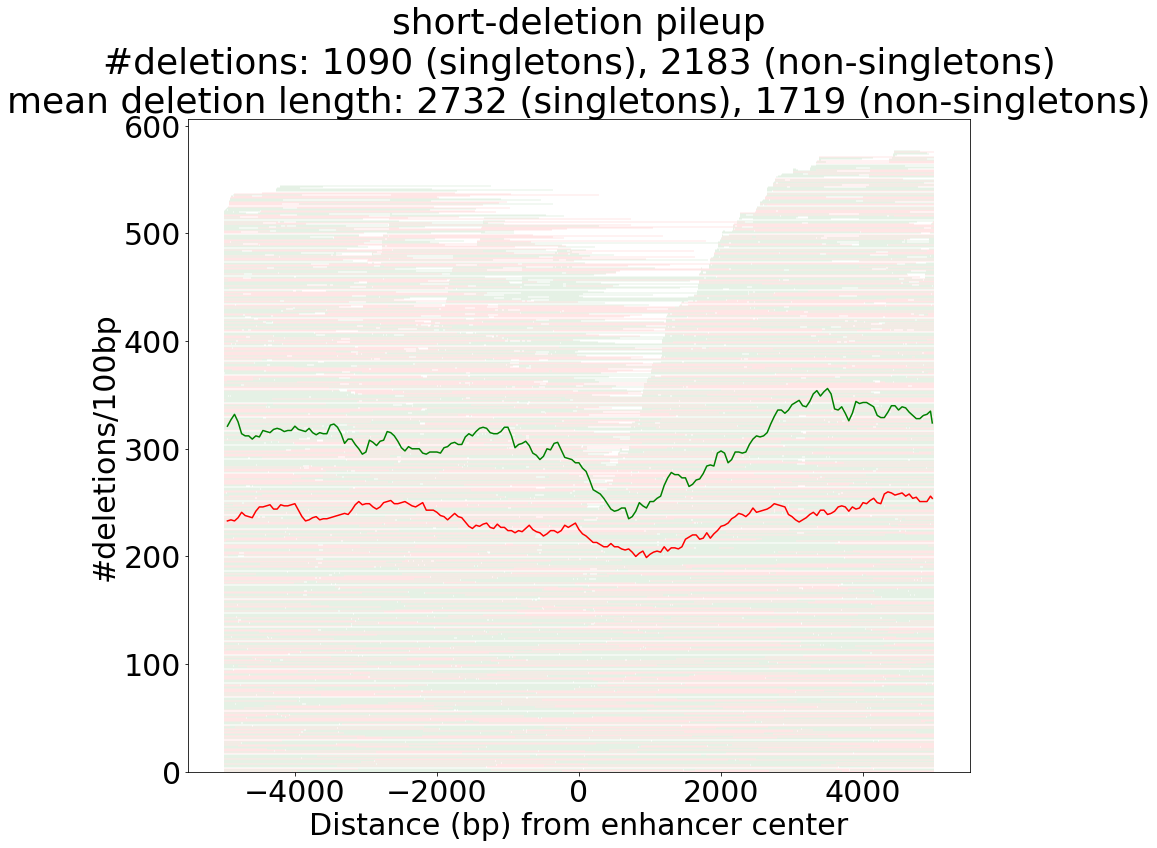

Wrote windows with deletion overlaps to: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/enhancer-straddling-windows-intersect-medium-observed-deletions.bed



Wrote deletions: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/medium-observed-singleton-deletions.bed


Wrote coverage: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/medium-observed-singleton-deletions-coverage.bed



Wrote deletions: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/medium-observed-non-singleton-deletions.bed


Wrote coverage: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/medium-observed-non-singleton-deletions-coverage.bed



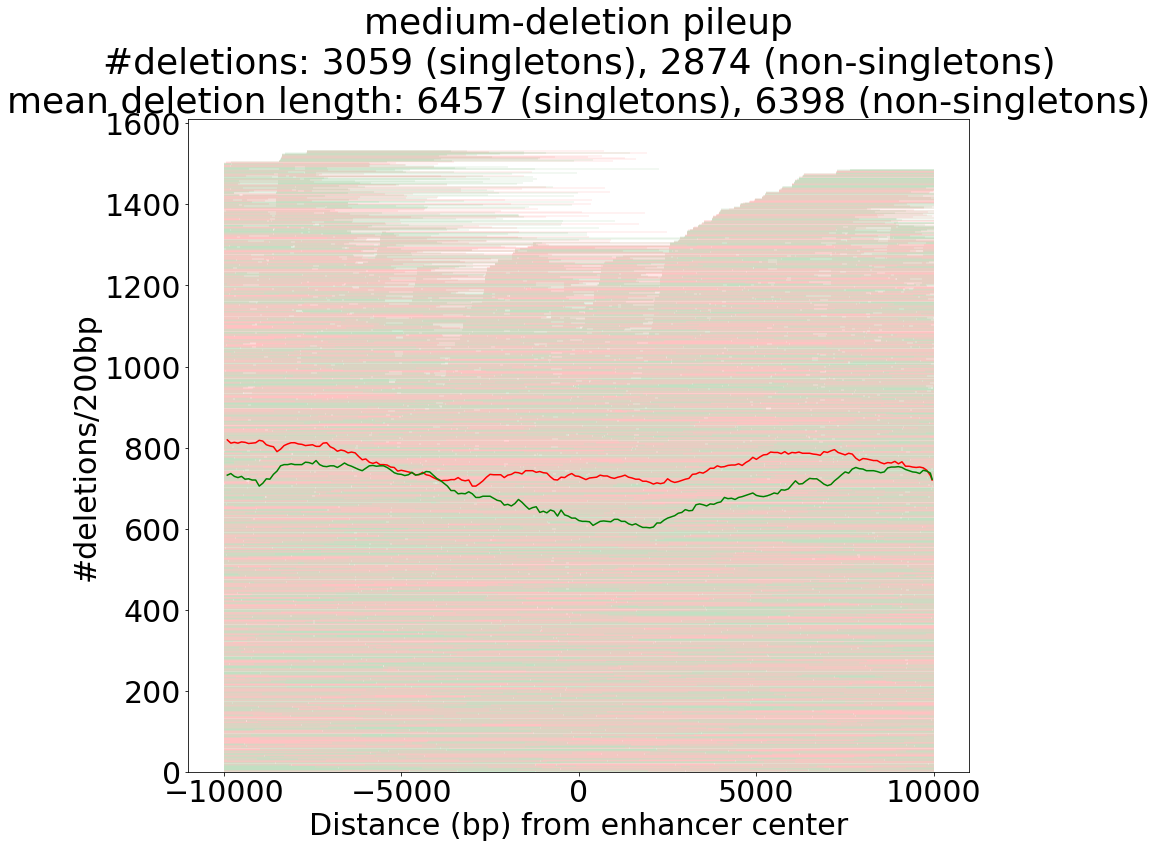

Wrote windows with deletion overlaps to: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/enhancer-straddling-windows-intersect-long-observed-deletions.bed



Wrote deletions: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/long-observed-singleton-deletions.bed


Wrote coverage: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/long-observed-singleton-deletions-coverage.bed



Wrote deletions: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/long-observed-non-singleton-deletions.bed


Wrote coverage: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/khurana/long-observed-non-singleton-deletions-coverage.bed



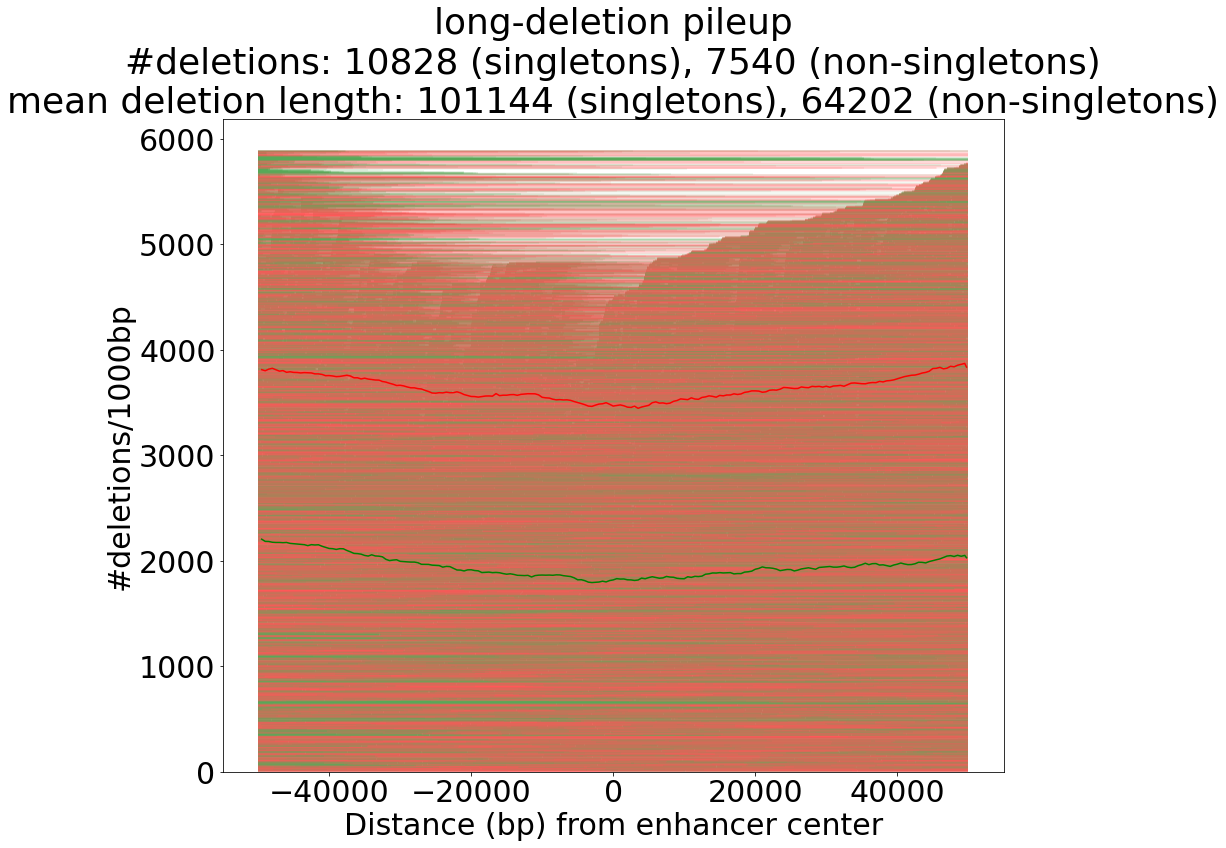

In [30]:
for deletion_type, window_size, ymax in zip(
  ['short', 'medium', 'long'],
  [10000, 20000, 100000],
  [None]*3
): 
  plot_pileup_and_coverage(
    deletion_type, 
    window_size,
    ymax, 
    plot_coverage=True,
    filter_enhancers=filter_3
  )